In [1]:
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram

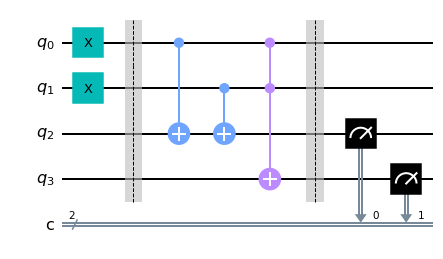

In [2]:
qc = QuantumCircuit(4,2)
#initializing inputs as 11
qc.x(0)
qc.x(1)
qc.barrier()
# logic for calculating sum and carry
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.barrier()
#measuring
qc.measure(2,0) 
qc.measure(3,1) 

qc.draw()

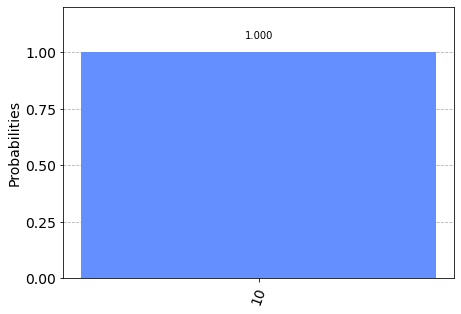

In [3]:
#answer using simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
results = aer_sim.run(qc).result()
answer = results.get_counts()

plot_histogram(answer)

In [4]:
#using real quantum computer
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x:x.configuration().n_qubits >= 4 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_belem


In [ ]:
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_bv_circuit = transpile(qc, backend)
job = backend.run(transpiled_bv_circuit, shots=shots)

job_monitor(job, interval=2)

Job Status: job is queued (3)     

In [ ]:
# Get the results from the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)